In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# Problem Statement1( Airlines data )

In [2]:
airln = pd.read_excel('Airlines+Data.xlsx')
print(airln.info())
airln

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB
None


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
airln["Month"]=pd.to_datetime(airln["Month"],errors = 'ignore')

In [4]:
airln

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


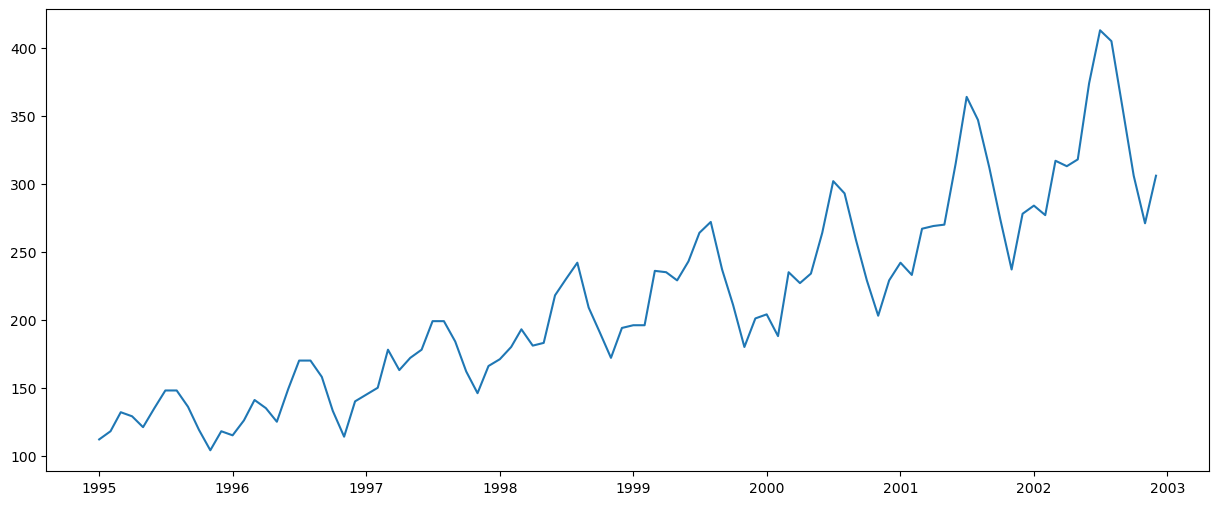

In [5]:
plt.figure(figsize=(15,6))
plt.plot(airln["Month"],airln["Passengers"])

# Moving Average

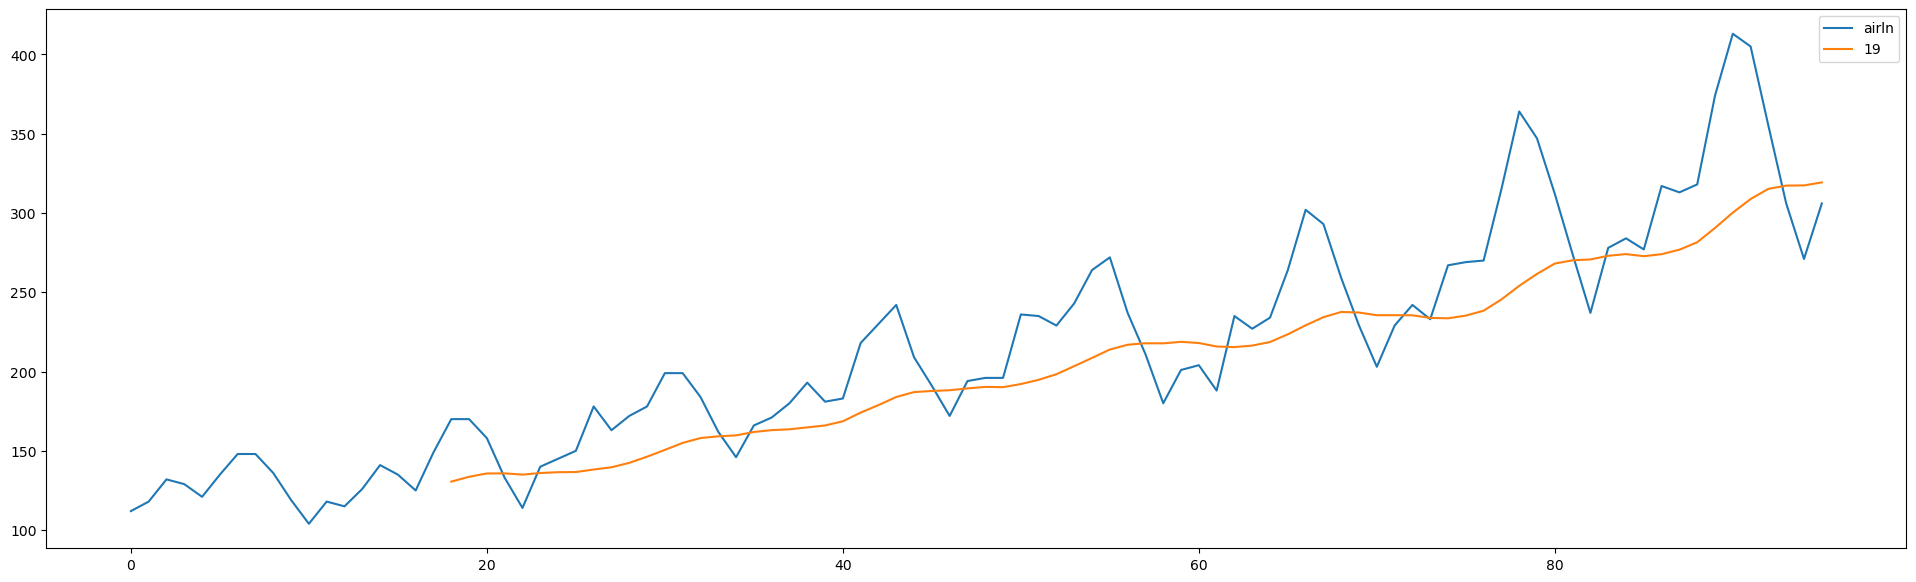

In [6]:
plt.figure(figsize=(24,7))
airln.Passengers.plot(label="airln")
pred = pd.DataFrame()
pred["Moving_Avg"] = airln["Passengers"].rolling(19).mean()
pred["Moving_Avg"].plot(label=str(19))
plt.legend(loc='best')

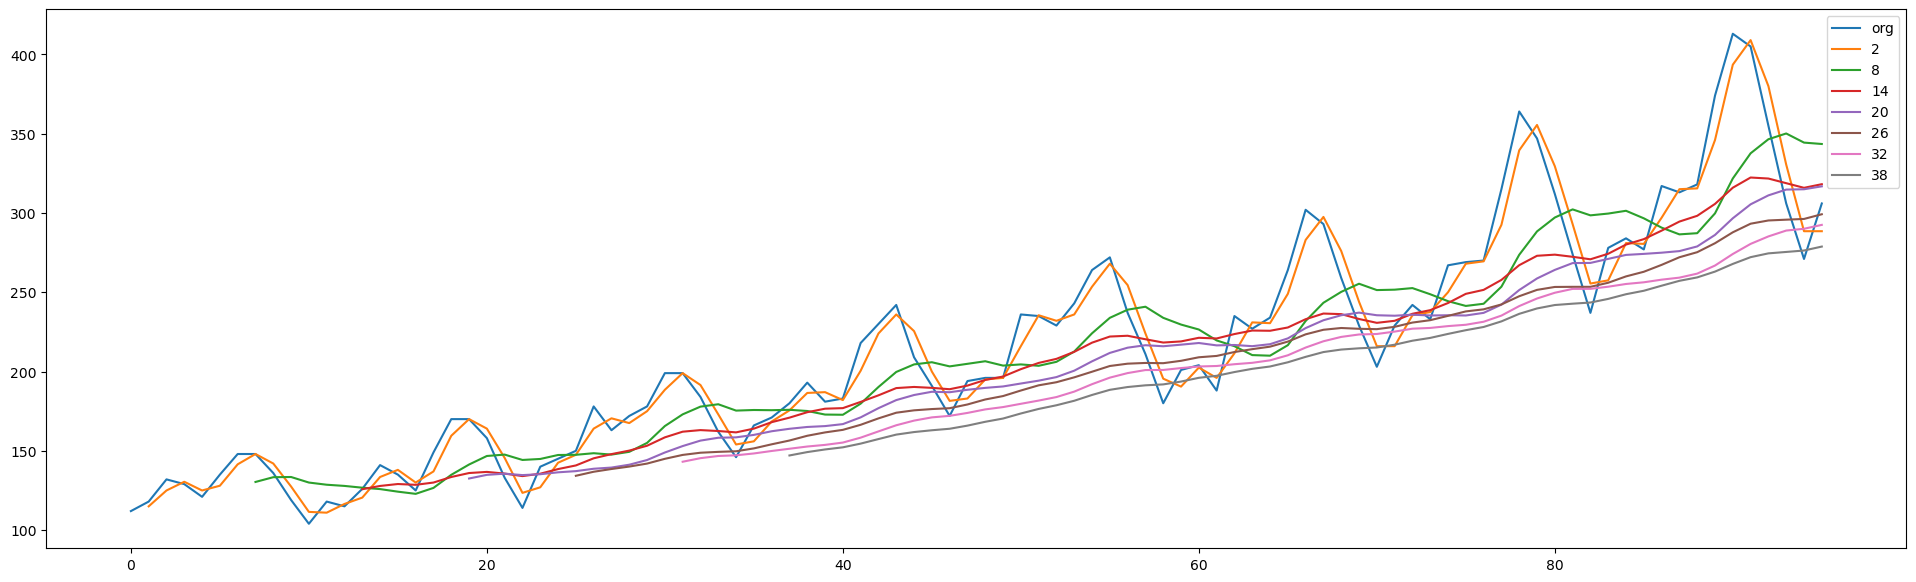

In [7]:
plt.figure(figsize=(24,7))
airln.Passengers.plot(label="org")
for i in range(2,40,6):
    airln["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

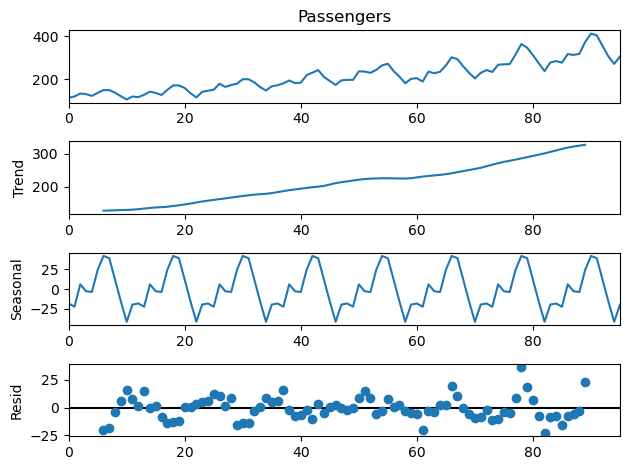

In [8]:
decompose_ts_add = seasonal_decompose(airln.Passengers,period= 12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

C:\Anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


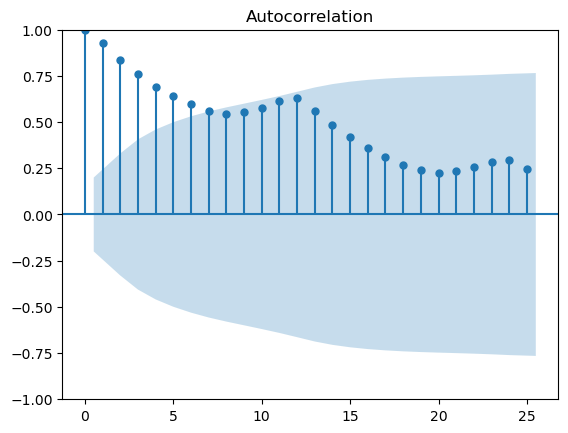

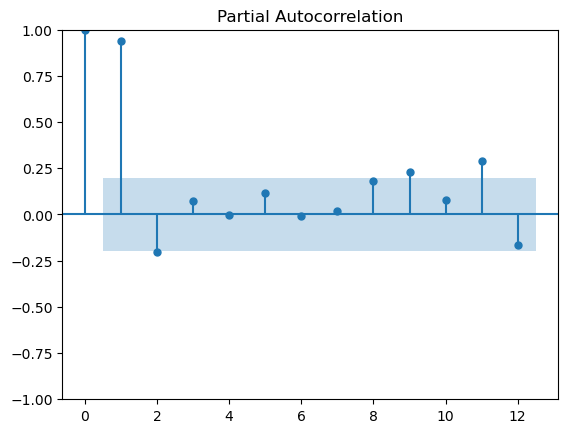

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airln.Passengers,lags=25)
tsa_plots.plot_pacf(airln.Passengers,lags=12)
plt.show()

In [12]:
df = airln.sort_index()

In [13]:
split_percentage = 0.8
split_index = int(split_percentage * len(df))

In [14]:
Train = df.iloc[:split_index]
Test = df.iloc[split_index:]

In [15]:
print(f'Training set shape: {Train.shape}')  # Fix variable name here
print(f'Testing set shape: {Test.shape}')   # Fix variable name here

Training set shape: (76, 2)
Testing set shape: (20, 2)


# Evaluation Metric MAPE(Mean Absolute Percentage Error )

In [16]:
def MAPE(pred, org):
    # Calculate the absolute percentage error for each observation
    temp = np.abs((pred - org) / org) * 100
    
    # Calculate the mean of the absolute percentage errors
    return np.mean(temp)

In [17]:
Test

,Month,Passengers
76,2001-05-01,270
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277


# Simple Exponential Smoothing

In [24]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [25]:
smoothing_levels = np.arange(0.01, 1.0, 0.01)

In [26]:
best_mape = float('inf')
optimal_smoothing = None

In [27]:
for smoothing_level in smoothing_levels:
    # Fit SES model
    ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=smoothing_level)

In [29]:
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start=Test.index[0], end=Test.index[-1])

In [30]:
mape = MAPE(pred_ses["Exp_Smoothing"], Test.Passengers)

In [31]:
if mape < best_mape:
        best_mape = mape
        optimal_smoothing = smoothing_level

In [32]:
print(f'Optimal Smoothing Level: {optimal_smoothing}')

Optimal Smoothing Level: 0.99


In [33]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.99)
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses["Exp_Smoothing"],Test.Passengers) 
#pred_ses["Exp_Smoothing"]
#Test.Footfall

14.723724973922586

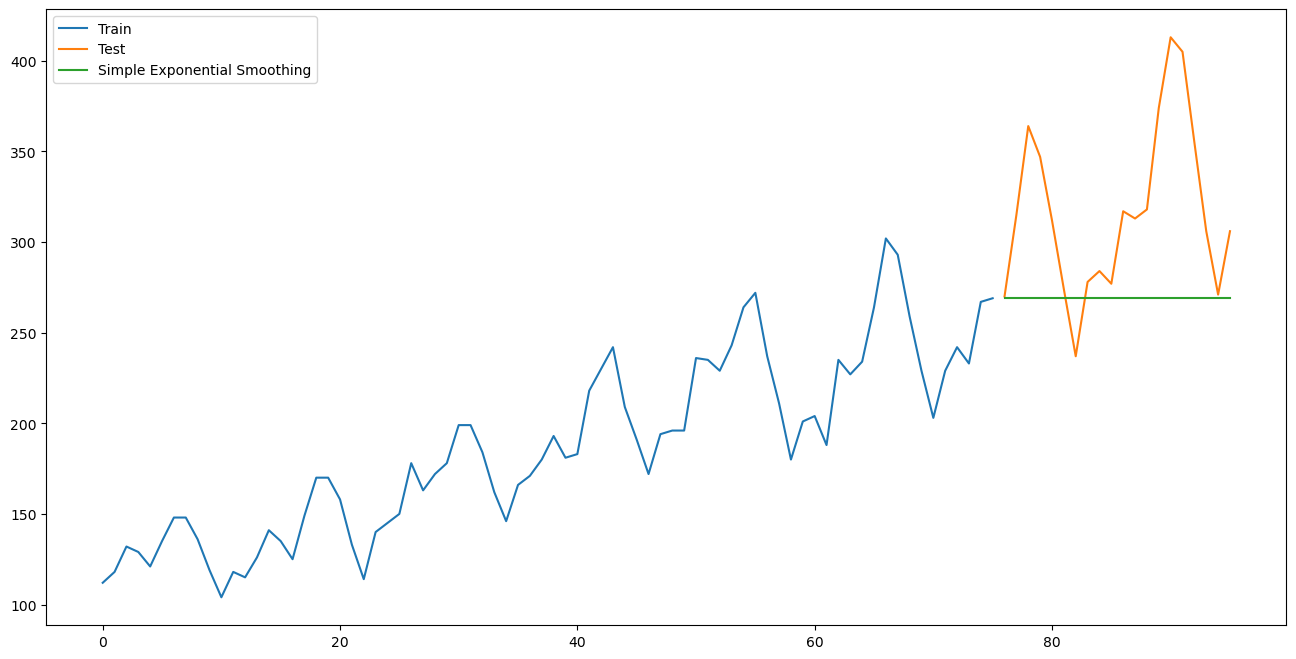

In [34]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_ses["Exp_Smoothing"], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

# Holt method 

In [36]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import Holt

# Assuming you have a dataset with 'Sales', and you've split it into Train and Test sets

# Define a range of smoothing levels and smoothing trends to test
smoothing_levels = np.arange(0.01, 1.0, 0.01)
smoothing_trends = np.arange(0.01, 1.0, 0.01)

# Initialize variables to store optimal values
best_mape = float('inf')
optimal_smoothing_level = None
optimal_smoothing_trend = None

# Iterate over smoothing levels and trends to find the optimal combination
for smoothing_level in smoothing_levels:
    for smoothing_trend in smoothing_trends:
        # Fit Holt model
        hw_model = Holt(Train["Passengers"]).fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend)
        
        # Make predictions on the test set
        pred_hw = pd.DataFrame()
        pred_hw["holt_method"] = hw_model.predict(start=Test.index[0], end=Test.index[-1])
        
        # Calculate MAPE
        mape = MAPE(pred_hw["holt_method"], Test.Passengers)
        
        # Update optimal values if current MAPE is lower
        if mape < best_mape:
            best_mape = mape
            optimal_smoothing_level = smoothing_level
            optimal_smoothing_trend = smoothing_trend

In [37]:
# Print the optimal values
print(f'Optimal Smoothing Level: {optimal_smoothing_level}')
print(f'Optimal Smoothing Trend: {optimal_smoothing_trend}')

Optimal Smoothing Level: 0.85
Optimal Smoothing Trend: 0.01


In [38]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.85, smoothing_trend=0.01)
pred_hw = pd.DataFrame()
pred_hw["holt_method"] = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw["holt_method"],Test.Passengers) 

11.164298823661365

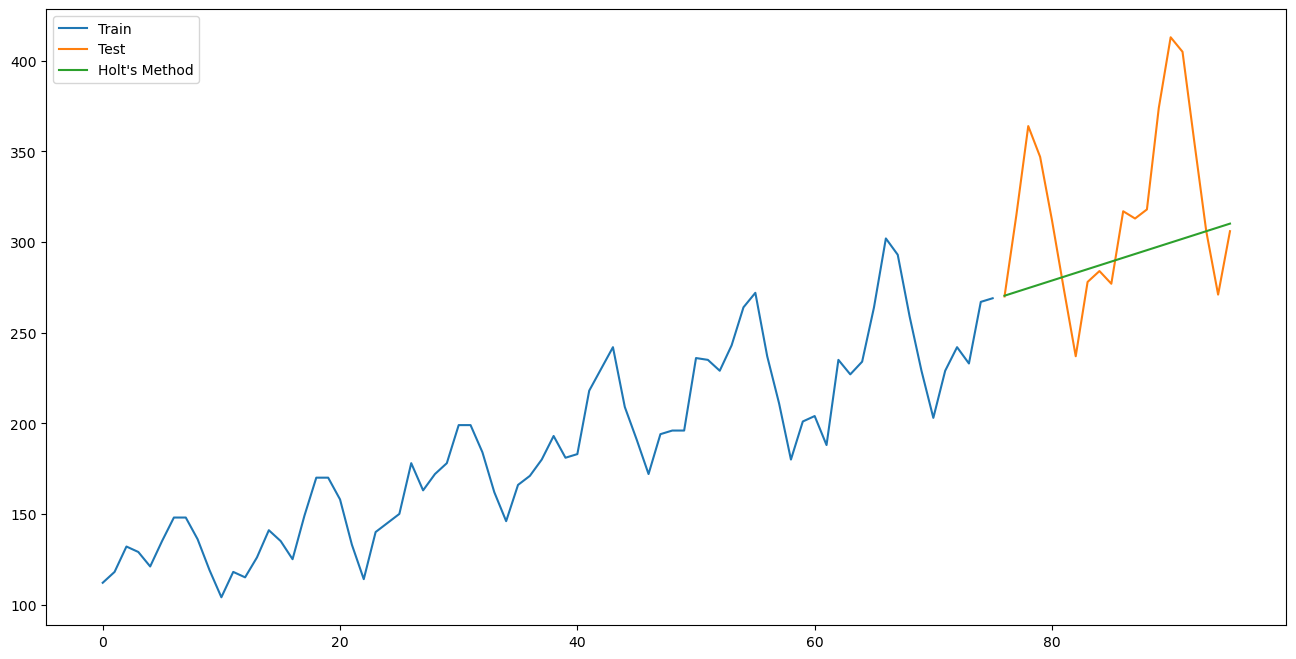

In [39]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_hw["holt_method"], label="Holt's Method")
plt.legend(loc='best')
plt.show()

# Holts winter exponential smoothing with additive seasonality and additive trend

In [40]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = pd.DataFrame()
pred_hwe_add_add["holt_winter_method"] = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add["holt_winter_method"],Test.Passengers) 

8.724211646423083

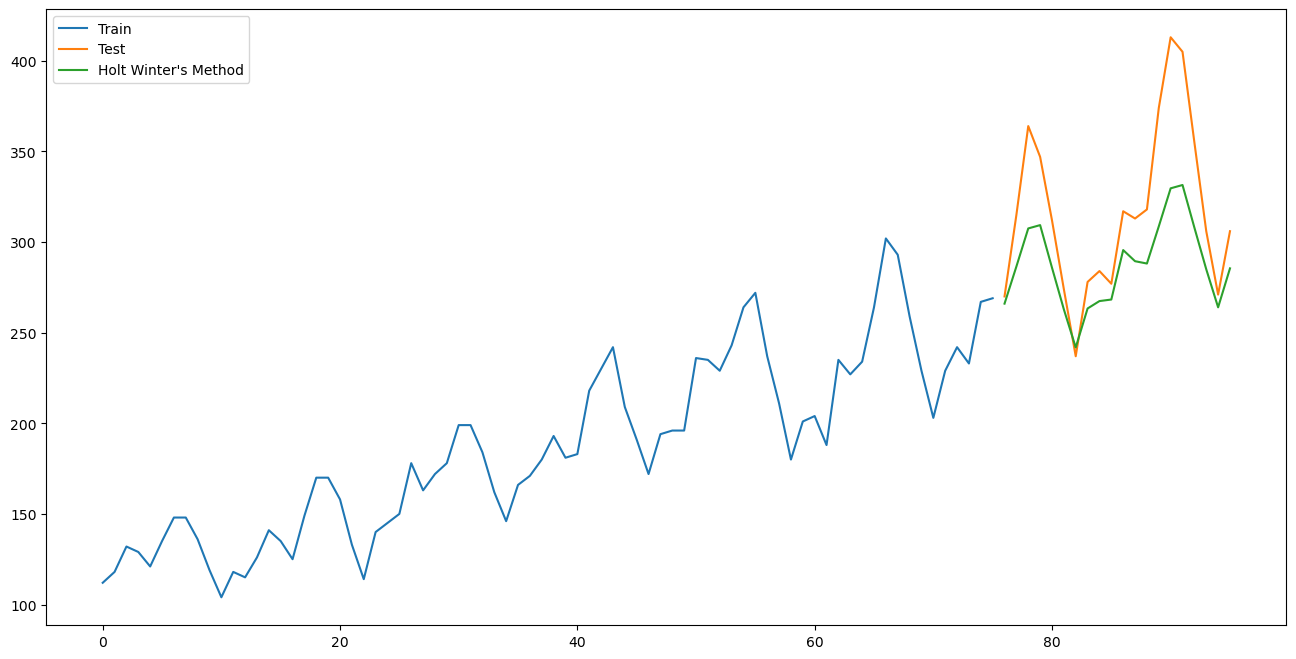

In [41]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_hwe_add_add["holt_winter_method"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [42]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = pd.DataFrame()
pred_hwe_mul_add["holt_winter_mul"] = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add["holt_winter_mul"] ,Test.Passengers)

9.375459574494764

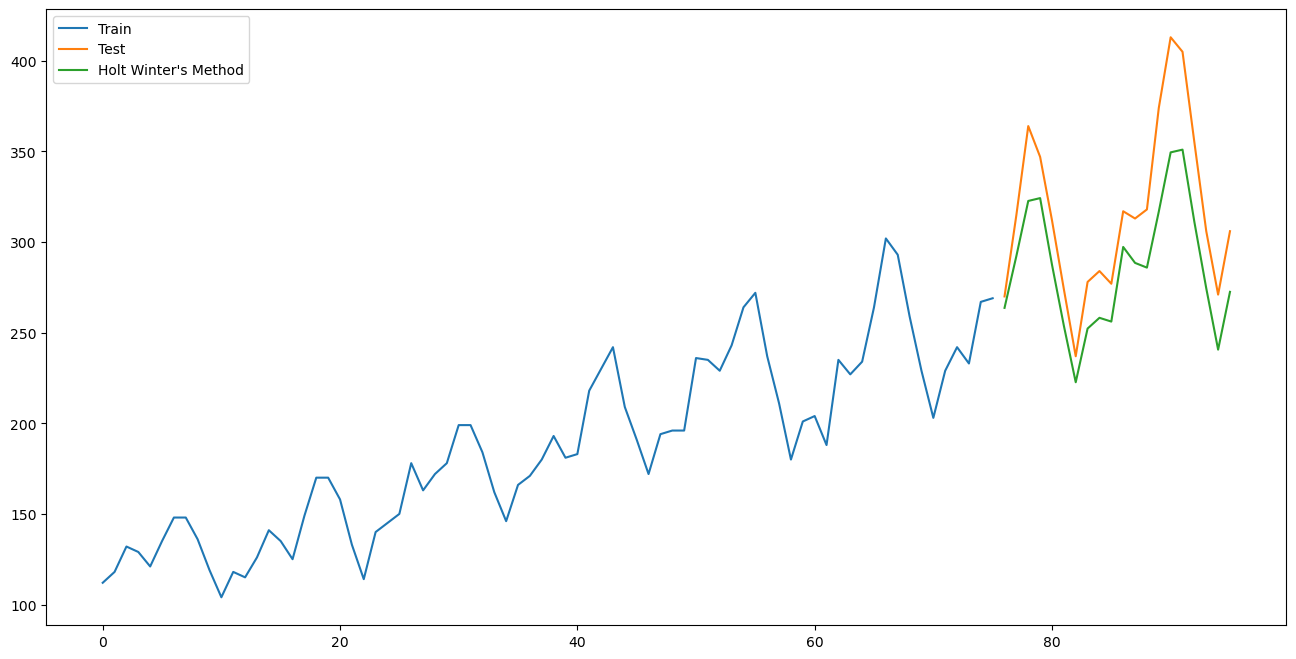

In [43]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_hwe_mul_add["holt_winter_mul"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

# Final Model by combining train and test

In [44]:
hwe_model_add_add = ExponentialSmoothing(airln.Passengers,seasonal="mul",trend="add",seasonal_periods=12).fit()

In [45]:
#Forecasting for next 10 time periods
future_data = hwe_model_add_add.forecast(15)
future_data

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
106    290.629755
107    330.595524
108    337.376594
109    332.122977
110    382.987983
dtype: float64

# Future Data Forecasting

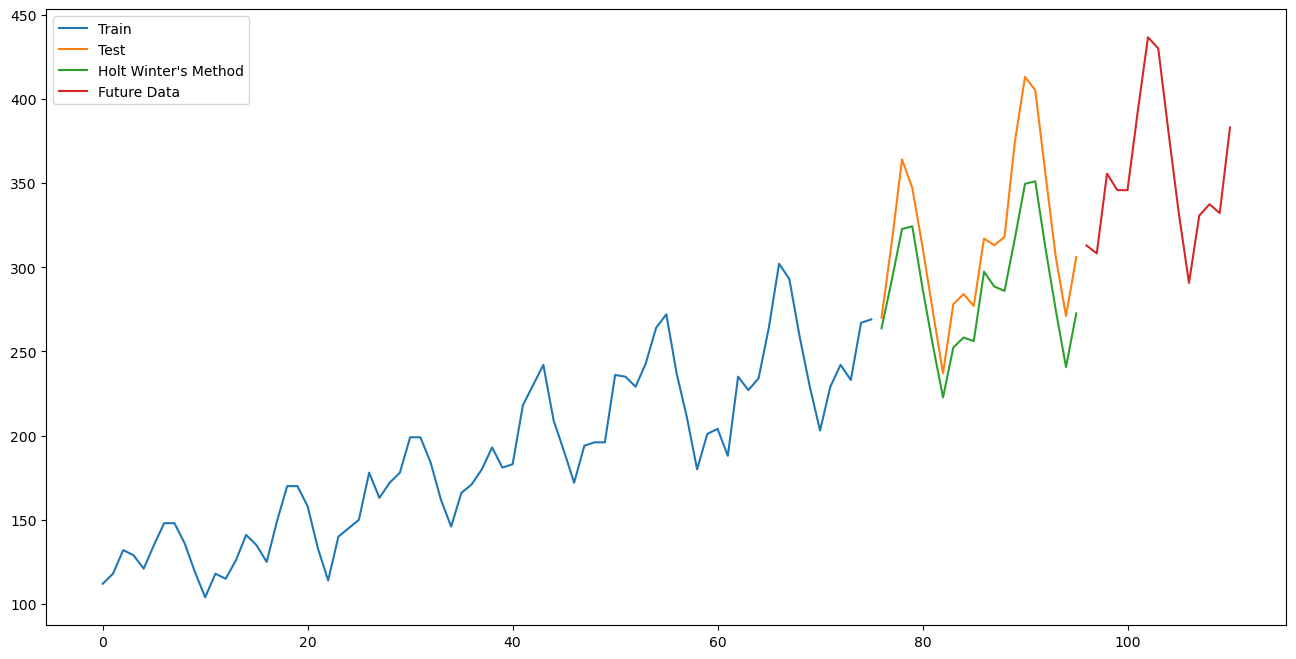

In [46]:
plt.figure(figsize=(16,8))
plt.plot(Train["Passengers"], label='Train')
plt.plot(Test["Passengers"], label='Test')
plt.plot(pred_hwe_mul_add["holt_winter_mul"], label="Holt Winter's Method")
plt.plot(future_data,label = "Future Data")
plt.legend(loc='best')
plt.show()

# Problem Statement2( cocacola data )

In [47]:
cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [48]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


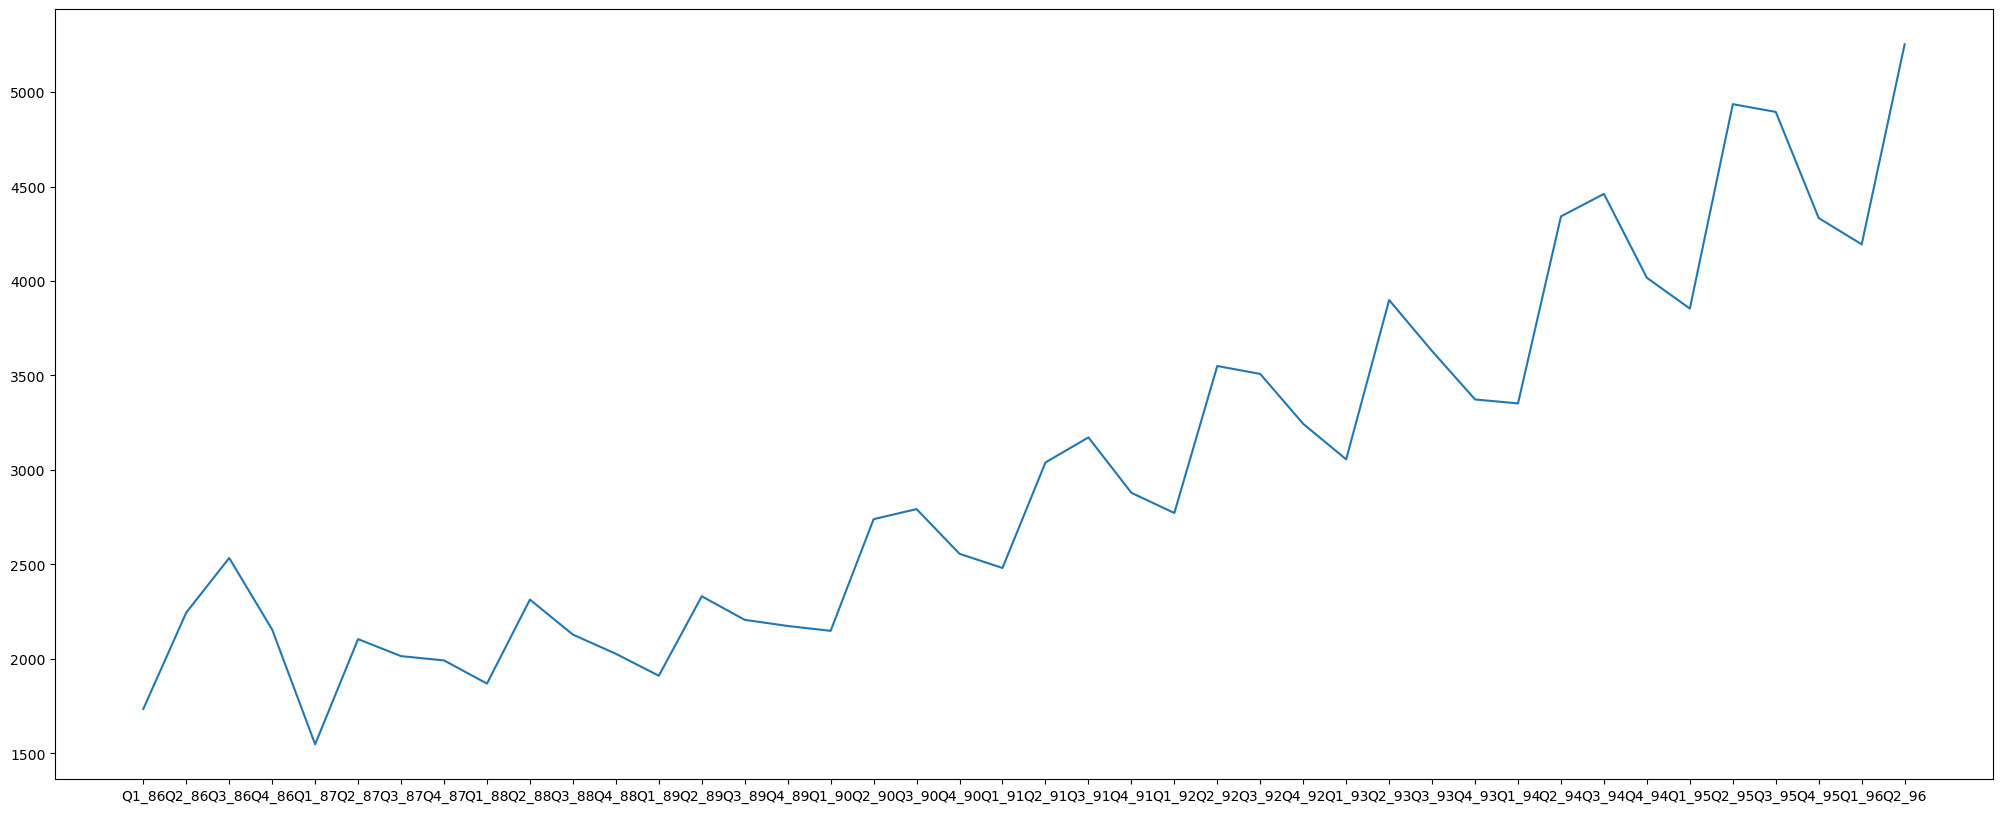

In [49]:
plt.figure(figsize=(25,10))
plt.plot(cola["Quarter"],cola["Sales"])

# Moving Average

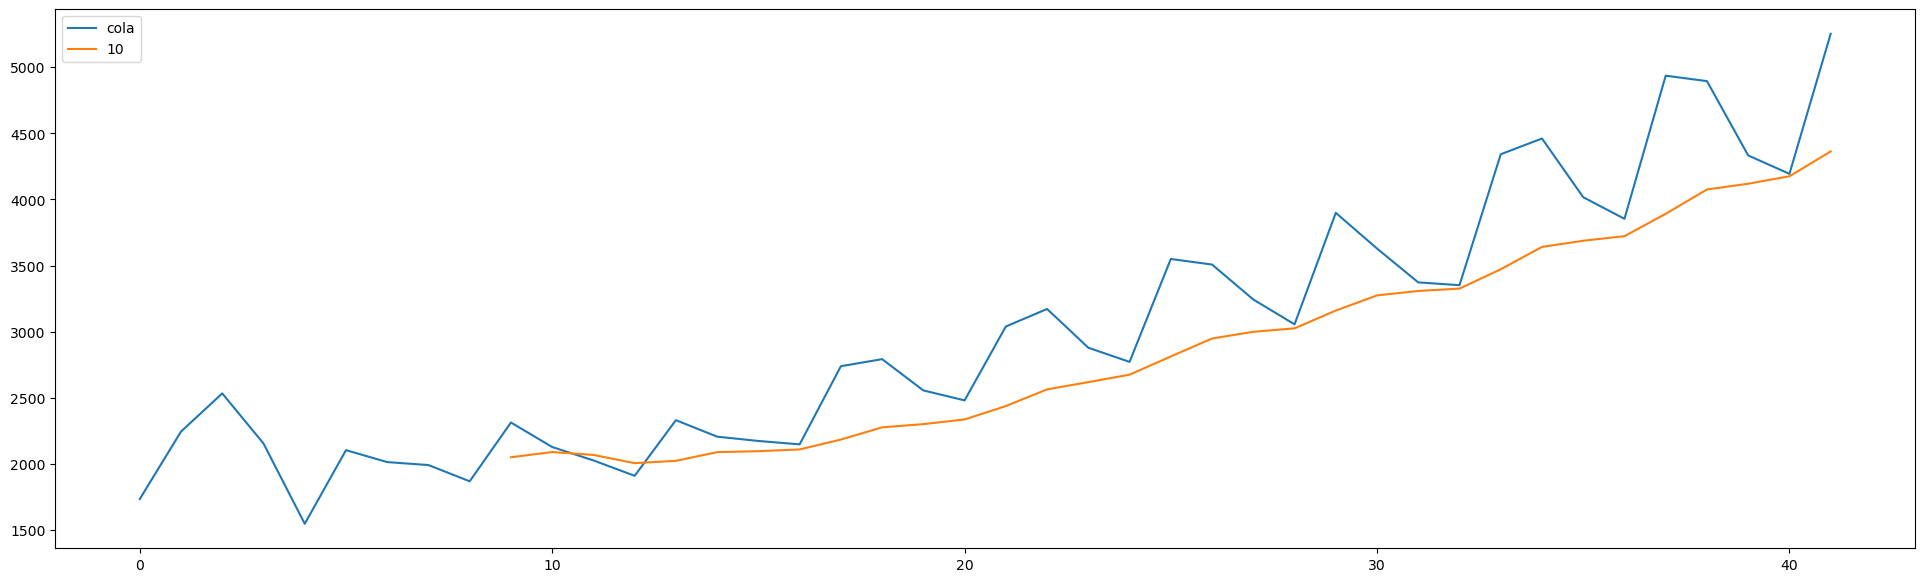

In [50]:
plt.figure(figsize=(24,7))
cola.Sales.plot(label="cola")
pred = pd.DataFrame()
pred["Moving_Avg"] = cola["Sales"].rolling(10).mean()
pred["Moving_Avg"].plot(label=str(10))
plt.legend(loc='best')

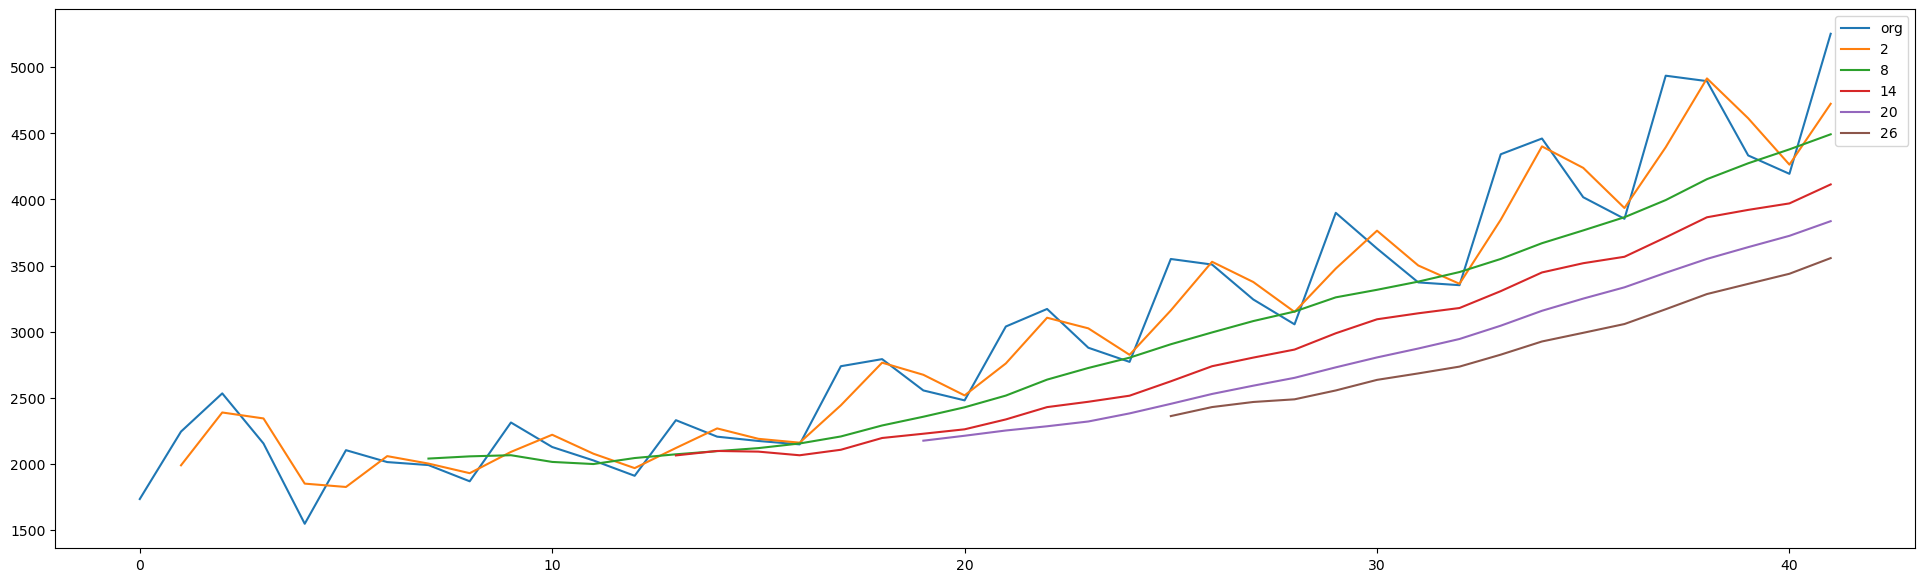

In [51]:
plt.figure(figsize=(24,7))
cola.Sales.plot(label="org")
for i in range(2,30,6):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

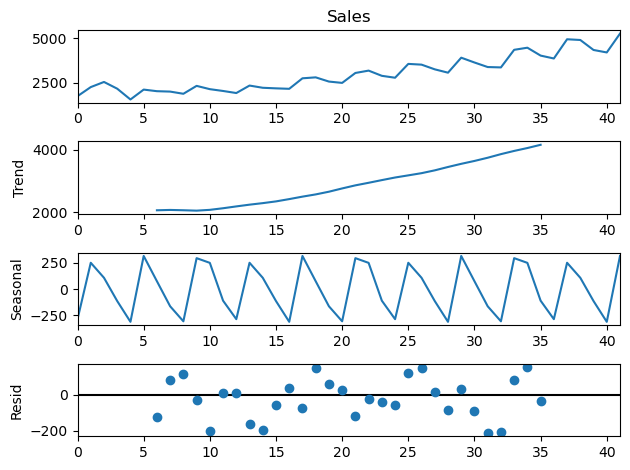

In [52]:
decompose_ts_add = seasonal_decompose(cola.Sales,period= 12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

C:\Anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


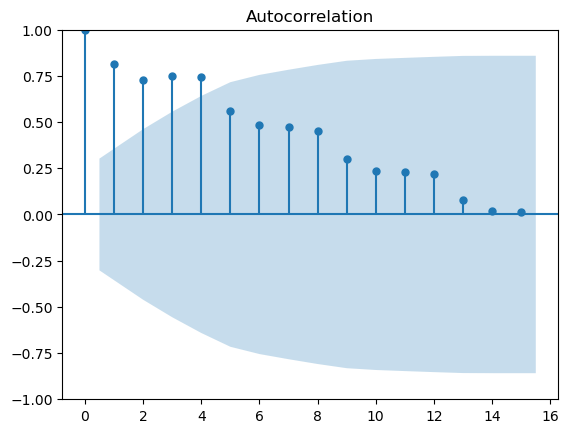

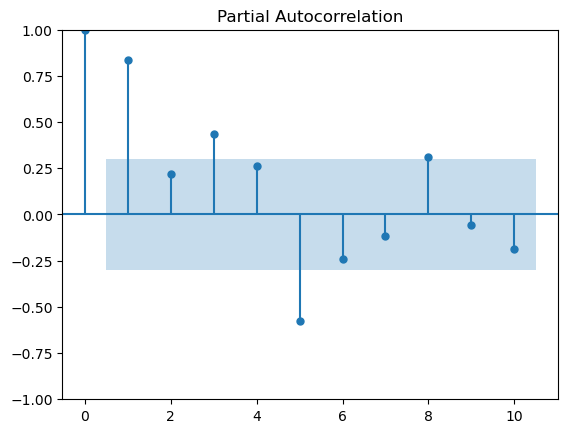

In [53]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=15)
tsa_plots.plot_pacf(cola.Sales,lags=10)
plt.show()

# split dataset for training and testing

In [55]:
dd = cola.sort_index()

In [56]:
split_percentage = 0.75
split_index = int(split_percentage * len(dd))

In [58]:
Train = dd.iloc[:split_index]
Test = dd.iloc[split_index:]

In [59]:
print(f'Training set shape: {Train.shape}')
print(f'Testing set shape: {Test.shape}')

Training set shape: (31, 2)
Testing set shape: (11, 2)


# Evaluation Metric MAPE(Mean Absolute Percentage Error )

In [60]:
def MAPE(pred, org):
    # Calculate the absolute percentage error for each observation
    temp = np.abs((pred - org) / org) * 100
    
    # Calculate the mean of the absolute percentage errors
    return np.mean(temp)

In [61]:
Test

,Quarter,Sales
31,Q4_93,3373.0
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0


# Simple Exponential Smoothing

In [62]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming you have a dataset with 'Sales', and you've split it into Train and Test sets

# Define a range of smoothing levels to test
smoothing_levels = np.arange(0.01, 1.0, 0.01)

# Initialize variables to store optimal values
best_mape = float('inf')
optimal_smoothing = None

# Iterate over smoothing levels and find the optimal one
for smoothing_level in smoothing_levels:
    # Fit SES model
    ses_model = SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=smoothing_level)
    
    # Make predictions on the test set
    pred_ses = pd.DataFrame()
    pred_ses["Exp_Smoothing"] = ses_model.predict(start=Test.index[0], end=Test.index[-1])
    
    # Calculate MAPE
    mape = MAPE(pred_ses["Exp_Smoothing"], Test.Sales)
    
    # Update optimal values if current MAPE is lower
    if mape < best_mape:
        best_mape = mape
        optimal_smoothing = smoothing_level

# Print the optimal smoothing level
print(f'Optimal Smoothing Level: {optimal_smoothing}')

Optimal Smoothing Level: 0.8300000000000001


In [63]:
ses_model = SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=0.8300000000000001)
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses["Exp_Smoothing"],Test.Sales) 

16.013343303823273

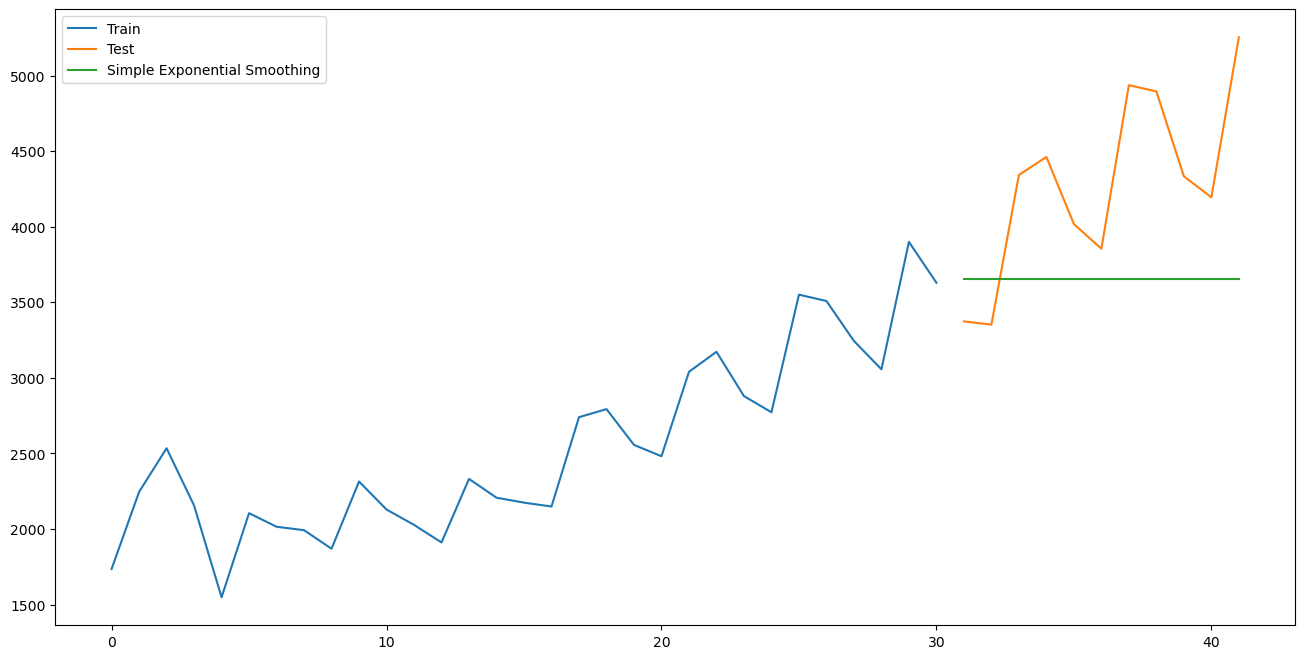

In [64]:
plt.figure(figsize=(16,8))
plt.plot(Train["Sales"], label='Train')
plt.plot(Test["Sales"], label='Test')
plt.plot(pred_ses["Exp_Smoothing"], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

# Holt method

In [65]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import Holt

# Assuming you have a dataset with 'Sales', and you've split it into Train and Test sets

# Define a range of smoothing levels and smoothing trends to test
smoothing_levels = np.arange(0.01, 1.0, 0.01)
smoothing_trends = np.arange(0.01, 1.0, 0.01)

# Initialize variables to store optimal values
best_mape = float('inf')
optimal_smoothing_level = None
optimal_smoothing_trend = None

# Iterate over smoothing levels and trends to find the optimal combination
for smoothing_level in smoothing_levels:
    for smoothing_trend in smoothing_trends:
        # Fit Holt model
        hw_model = Holt(Train["Sales"]).fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend)
        
        # Make predictions on the test set
        pred_hw = pd.DataFrame()
        pred_hw["holt_method"] = hw_model.predict(start=Test.index[0], end=Test.index[-1])
        
        # Calculate MAPE
        mape = MAPE(pred_hw["holt_method"], Test.Sales)
        
        # Update optimal values if current MAPE is lower
        if mape < best_mape:
            best_mape = mape
            optimal_smoothing_level = smoothing_level
            optimal_smoothing_trend = smoothing_trend

# Print the optimal values
print(f'Optimal Smoothing Level: {optimal_smoothing_level}')
print(f'Optimal Smoothing Trend: {optimal_smoothing_trend}')

Optimal Smoothing Level: 0.03
Optimal Smoothing Trend: 0.6900000000000001


In [66]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.03, smoothing_trend=0.6900000000000001)
pred_hw = pd.DataFrame()
pred_hw["holt_method"] = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw["holt_method"],Test.Sales) 

8.722248775924482

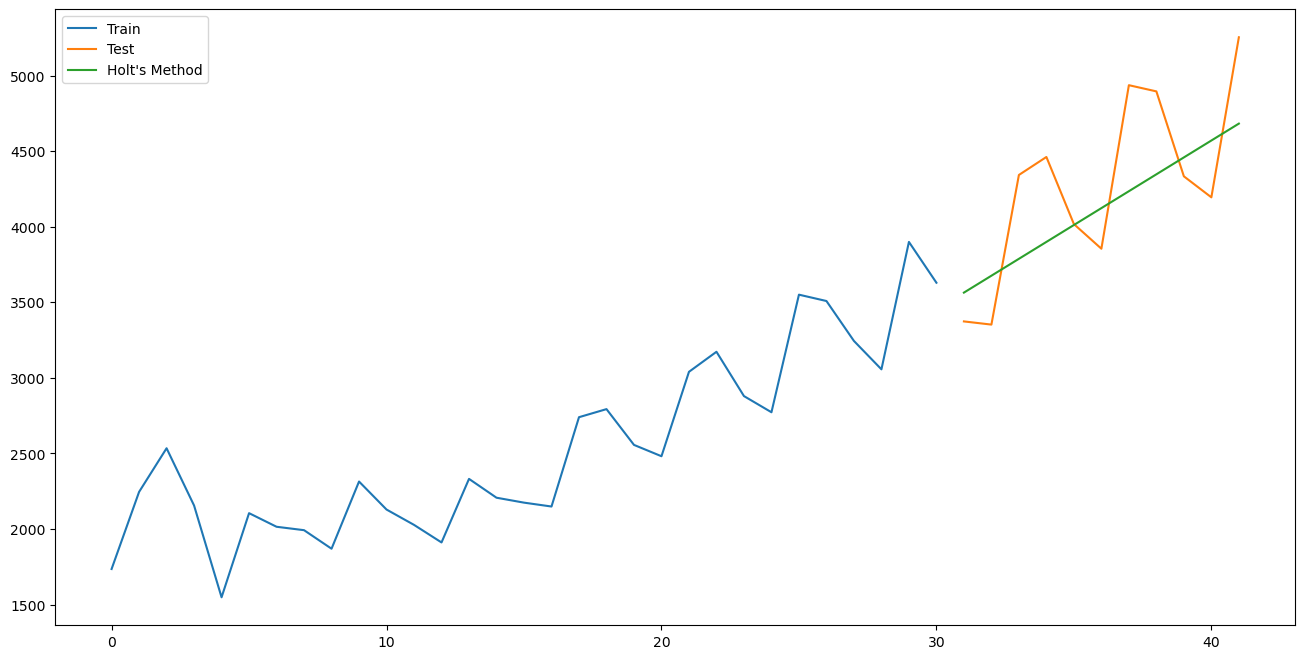

In [67]:
plt.figure(figsize=(16,8))
plt.plot(Train["Sales"], label='Train')
plt.plot(Test["Sales"], label='Test')
plt.plot(pred_hw["holt_method"], label="Holt's Method")
plt.legend(loc='best')
plt.show()

# Holts winter exponential smoothing with additive seasonality and additive trend

In [68]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = pd.DataFrame()
pred_hwe_add_add["holt_winter_method"] = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add["holt_winter_method"],Test.Sales) 

9.734470165918934

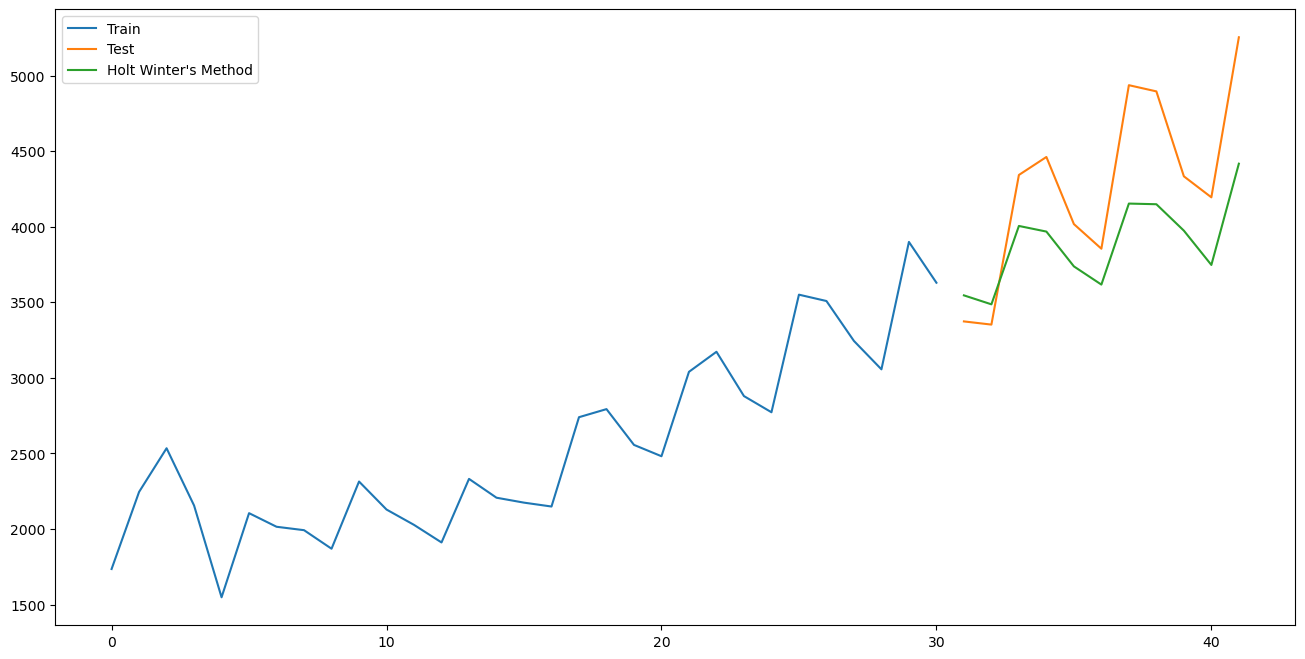

In [69]:
plt.figure(figsize=(16,8))
plt.plot(Train['Sales'], label='Train')
plt.plot(Test["Sales"], label='Test')
plt.plot(pred_hwe_add_add["holt_winter_method"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [70]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = pd.DataFrame()
pred_hwe_mul_add["holt_winter_mul"] = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add["holt_winter_mul"] ,Test.Sales)

12.504228519416655

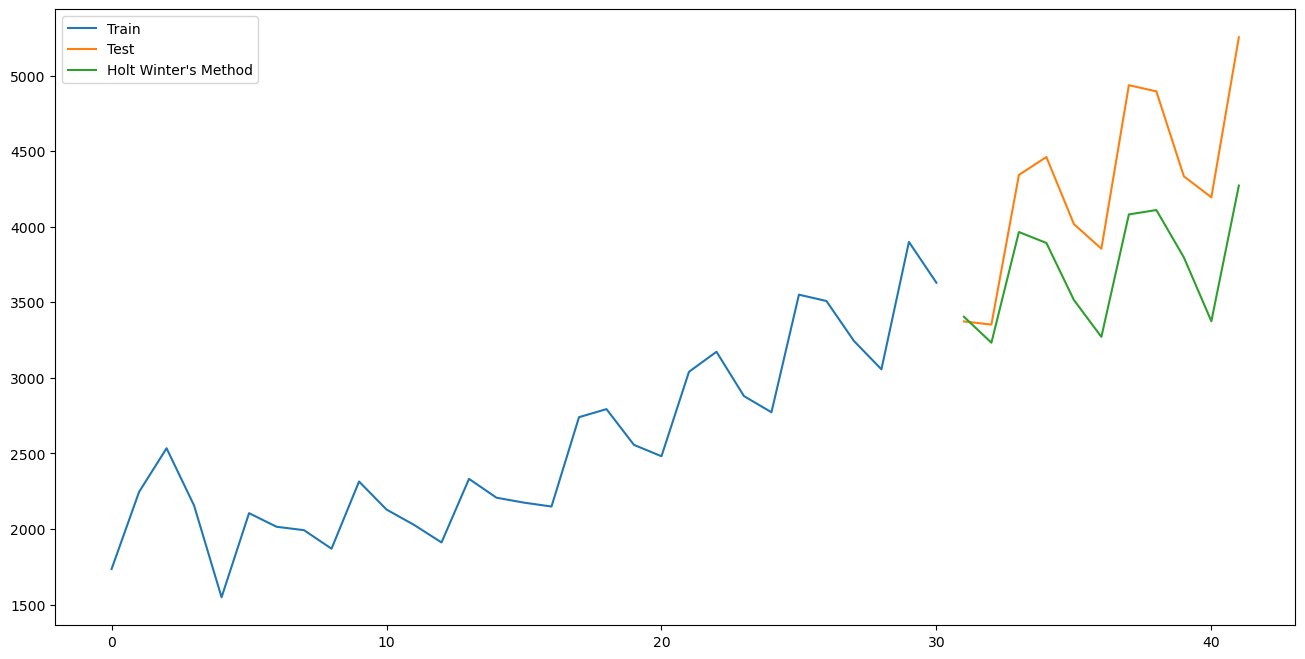

In [71]:
plt.figure(figsize=(16,8))
plt.plot(Train["Sales"], label='Train')
plt.plot(Test["Sales"], label='Test')
plt.plot(pred_hwe_mul_add["holt_winter_mul"], label="Holt Winter's Method")
plt.legend(loc='best')
plt.show()


# Final Model by combining train and test

In [72]:
hwe_model_add_add = ExponentialSmoothing(cola.Sales,seasonal="mul",trend="add",seasonal_periods=12).fit()
#Forecasting for next 10 time periods
future_data = hwe_model_add_add.forecast(15)
future_data

42    5012.344209
43    4653.573883
44    4512.618744
45    5673.548341
46    5715.159774
47    5161.415217
48    4909.552114
49    6205.541243
50    6166.703338
51    5529.963063
52    5104.693031
53    6435.671650
54    6115.487816
55    5659.311710
56    5470.639048
dtype: float64

# Future Data Forecasting

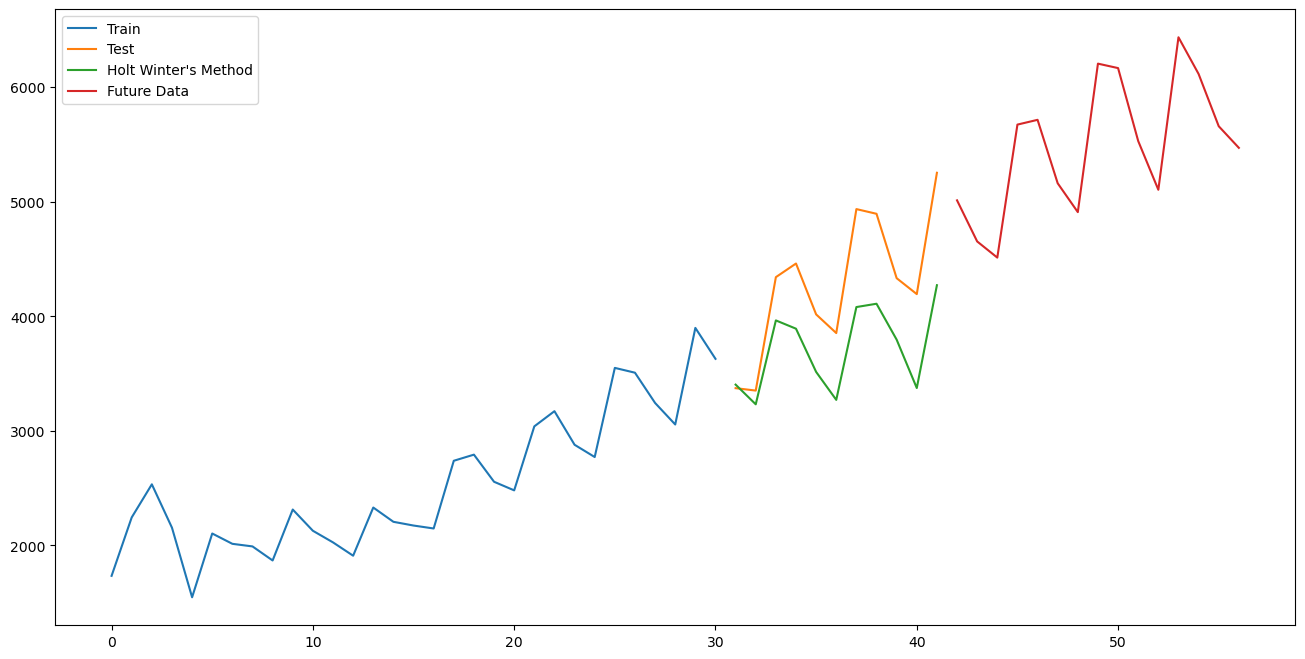

In [73]:
plt.figure(figsize=(16,8))
plt.plot(Train["Sales"], label='Train')
plt.plot(Test["Sales"], label='Test')
plt.plot(pred_hwe_mul_add["holt_winter_mul"], label="Holt Winter's Method")
plt.plot(future_data,label = "Future Data")
plt.legend(loc='best')
plt.show()